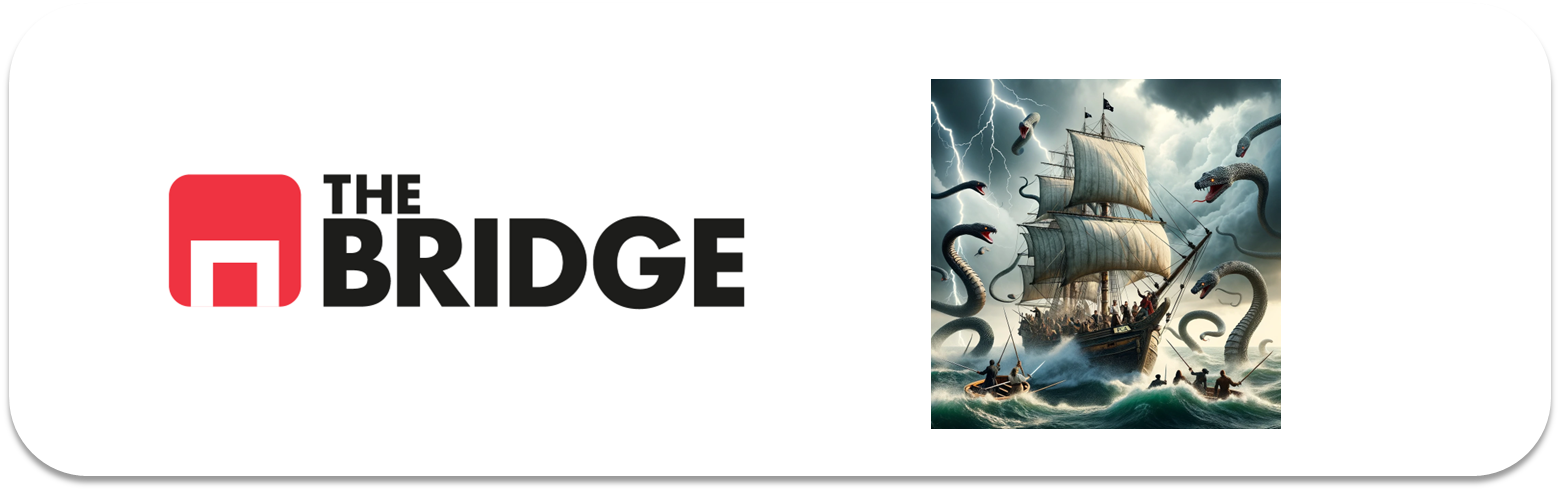

## PRACTICA OBLIGATORIA: **No Supervisado: PCA**

* La práctica obligatoria de esta unidad consiste en aplicar PCA a un dataset de imágenes con diferentes objetivos y compromisos. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### El problema de negocio

El Caesar Palace de las Vegas está planificando la instalación de mil quininetas microcámaras en los accesos a sus instalaciones para las próximas sesiones del "Poker World Championship". Estas microcámaras tienen la peculiaridad de que son capaces de tomar fotos encuadradas de las caras y la desventaja de que no tienen un gran ancho de banda de comunicación. (Las había de más ancho y de mayor precio...). NOTA: El ancho de banda limita el tamaño de las imágenes que pueden enviar las microcámaras).

El objetivo de las microcámaras es el de detectar personas "non-gratas" en tiempo real, pudiendo posprocesar las imágenes para poder detectar si han accedido a las instalaciones personas que estuvieran perseguidas por la ley, en los bancos de datos de los casinos identificadas como "peligrosas" (no se sabe si para el resto de personas o para los beneficios de los casinos) y en las listas de no admisión de jugadores adictos. Por eso no necesitan procesar los datos en tiempo real, pero sí enviarlos a un repositorio central. 

¿Cuál es su problema? O bien comprimen las imágenes y las procesan comprimidas en cada microcámara (pueden comprimir muy rápido pero no tienen cpu para procesarlas sin comprimir) o bien las comprimen y las mandan a un servidor central muy rápido (por eso ti) donde se descomprimirían y se analizarían. Analizar quiere decir en este contexto, pasarles un modelo de clasificación que determine si la persona de la imagen es una de las listas prohibidas (o sea que clasifique la imágen).  

Nos han enviado un dataset y con él debemos estudiar cuál de las dos soluciones es más interesante y dar recomendaciones al respecto. Vamos a ello.

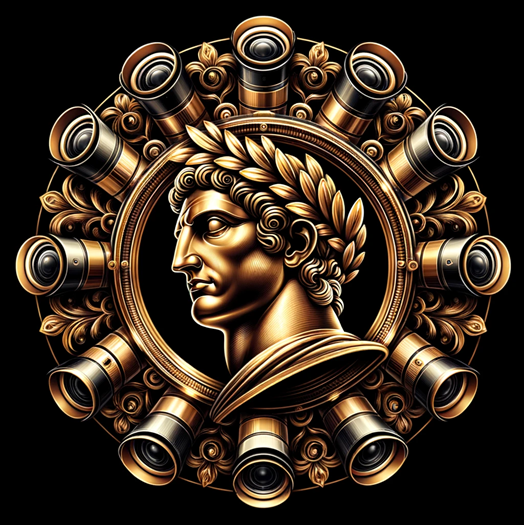

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [16]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [17]:
df_prueba = pd.read_csv("./data/prueba.csv")

df_prueba_comprimida = pd.read_csv("./data/prueba_comprimida.csv")

In [18]:
df_prueba

,Unnamed: 0,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_4086,pixel_4087,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095
0,139,0.409091,0.500000,0.619835,0.611570,0.619835,0.603306,0.677686,0.723140,0.760331,...,0.227273,0.173554,0.173554,0.177686,0.103306,0.090909,0.078512,0.095041,0.090909,0.082645
1,58,0.256198,0.400826,0.301653,0.264463,0.202479,0.545455,0.607438,0.615702,0.673554,...,0.590909,0.603306,0.595041,0.611570,0.603306,0.611570,0.619835,0.652893,0.690083,0.698347
2,34,0.669422,0.665289,0.694215,0.702479,0.710744,0.739669,0.760331,0.772727,0.785124,...,0.326446,0.330578,0.330578,0.347107,0.322314,0.351240,0.351240,0.334711,0.334711,0.338843
3,126,0.285124,0.285124,0.272727,0.214876,0.169422,0.165289,0.264463,0.446281,0.491736,...,0.359504,0.342975,0.326446,0.322314,0.301653,0.289256,0.305785,0.301653,0.309917,0.314050
4,109,0.256198,0.264463,0.260331,0.466942,0.727273,0.814050,0.822314,0.818182,0.822314,...,0.268595,0.219008,0.169422,0.111570,0.161157,0.264463,0.152893,0.090909,0.111570,0.115702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,196,0.280992,0.359504,0.404959,0.446281,0.549587,0.578512,0.607438,0.652893,0.665289,...,0.500000,0.847107,0.888430,0.607438,0.438017,0.690083,0.611570,0.537190,0.260331,0.144628
316,278,0.768595,0.735537,0.764463,0.793388,0.805785,0.789256,0.789256,0.747934,0.789256,...,0.119835,0.194215,0.392562,0.334711,0.322314,0.342975,0.371901,0.301653,0.314050,0.371901
317,216,0.181818,0.338843,0.355372,0.404959,0.438017,0.458678,0.471074,0.479339,0.491736,...,0.152893,0.285124,0.392562,0.256198,0.396694,0.433884,0.392562,0.392562,0.454545,0.454545
318,29,0.541322,0.553719,0.582645,0.619835,0.632231,0.669422,0.702479,0.727273,0.735537,...,0.227273,0.243802,0.223140,0.243802,0.227273,0.223140,0.210744,0.223140,0.231405,0.227273


In [19]:
print(df_prueba_comprimida.columns.to_list())

['Unnamed: 0', 'pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5', 'pixel_6', 'pixel_7']


In [20]:
df_prueba_comprimida

,Unnamed: 0,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7
0,139,0.409091,0.500000,0.619835,0.611570,0.619835,0.603306,0.677686,0.723140
1,58,0.256198,0.400826,0.301653,0.264463,0.202479,0.545455,0.607438,0.615702
2,34,0.669422,0.665289,0.694215,0.702479,0.710744,0.739669,0.760331,0.772727
3,126,0.285124,0.285124,0.272727,0.214876,0.169422,0.165289,0.264463,0.446281
4,109,0.256198,0.264463,0.260331,0.466942,0.727273,0.814050,0.822314,0.818182
...,...,...,...,...,...,...,...,...,...
315,196,0.280992,0.359504,0.404959,0.446281,0.549587,0.578512,0.607438,0.652893
316,278,0.768595,0.735537,0.764463,0.793388,0.805785,0.789256,0.789256,0.747934
317,216,0.181818,0.338843,0.355372,0.404959,0.438017,0.458678,0.471074,0.479339
318,29,0.541322,0.553719,0.582645,0.619835,0.632231,0.669422,0.702479,0.727273


In [21]:
df_prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Columns: 4097 entries, Unnamed: 0 to pixel_4095
dtypes: float64(4096), int64(1)
memory usage: 10.0 MB


In [22]:
df_prueba_comprimida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  320 non-null    int64  
 1   pixel_0     320 non-null    float64
 2   pixel_1     320 non-null    float64
 3   pixel_2     320 non-null    float64
 4   pixel_3     320 non-null    float64
 5   pixel_4     320 non-null    float64
 6   pixel_5     320 non-null    float64
 7   pixel_6     320 non-null    float64
 8   pixel_7     320 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 22.6 KB


### #1 MODELO DE BASE

**Objetivo:** Construir un modelo baseline de clasficación de imágenes que las trate sin comprimir (es decir usando todos sus píxeles).

Para conseguir el objetivo, primero descarga el dataset de las caras de Olivetti que ya has utilizado anteriormente, empleando las funciones de sklearn necesarias. Luego, construye un clasificador con el modelo que consideres más apropiado y todas las features del dataset. Eso sí, recuerda hacer lo siguiente:

1. Construir un data frame con los datos 
2. Hacer un split en train y test con al menos 80 instancias en el test y estratificado según el target. Este split se ha de mantener en el resto de la práctica
3. Hacer un quick miniEDA o justificar el no hacerlo.
4. Medir la recall media (“balanced_accuracy”) sobre cross validation con 5 folds y sobre el conjunto de test y guarda ambas para usarlas como baseline en las siguientes partes




In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [24]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

In [25]:
df_olivetti = pd.DataFrame(olivetti.data, columns = [f"pixel_{i}" for i in range(4096) ])

In [26]:
df_olivetti.describe()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4086,pixel_4087,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.400134,0.434236,0.476281,0.518481,0.554845,0.588729,0.621426,0.647510,0.664814,0.676591,...,0.363079,0.367221,0.363027,0.355506,0.340196,0.338657,0.335909,0.321415,0.313647,0.310455
std,0.180695,0.189504,0.194742,0.193313,0.188593,0.178481,0.167109,0.155024,0.147616,0.143583,...,0.164952,0.181861,0.181611,0.188709,0.186088,0.189256,0.195280,0.187842,0.183616,0.180635
min,0.086777,0.066116,0.090909,0.041322,0.107438,0.107438,0.115702,0.115702,0.119835,0.140496,...,0.049587,0.037190,0.053719,0.049587,0.033058,0.012397,0.049587,0.057851,0.061983,0.033058
25%,0.243802,0.267562,0.314050,0.383264,0.446281,0.515496,0.544421,0.581612,0.599174,0.611570,...,0.227273,0.214876,0.219008,0.197314,0.177686,0.177686,0.173554,0.173554,0.173554,0.172521
50%,0.392562,0.458678,0.512397,0.545455,0.584711,0.615702,0.652893,0.669421,0.683884,0.702479,...,0.367769,0.367769,0.342975,0.334711,0.320248,0.314050,0.299587,0.289256,0.270661,0.272727
75%,0.528926,0.575413,0.636364,0.666322,0.702479,0.714876,0.735537,0.757231,0.772727,0.780992,...,0.484504,0.496901,0.500000,0.500000,0.479339,0.462810,0.462810,0.446281,0.414256,0.417355
max,0.805785,0.822314,0.871901,0.892562,0.871901,0.871901,0.871901,0.871901,0.871901,0.871901,...,0.793388,0.904959,0.888430,0.896694,0.826446,0.863636,0.921488,0.929752,0.884298,0.822314


In [27]:
df_olivetti["cara"] = olivetti.target
df_olivetti = df_olivetti.sample(len(df_olivetti))
train_val, test_set = train_test_split(df_olivetti, test_size = 40, stratify= df_olivetti["cara"], random_state= 42) # train_size
train_set, validation_set = train_test_split(train_val, test_size = 80, stratify= train_val["cara"], random_state= 43)
X_train = train_set.drop("cara", axis = 1)
X_valid = validation_set.drop("cara", axis = 1)
X_test = test_set.drop("cara", axis = 1)

y_train = train_set["cara"]
y_valid = validation_set["cara"]
y_test = test_set["cara"]

In [28]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

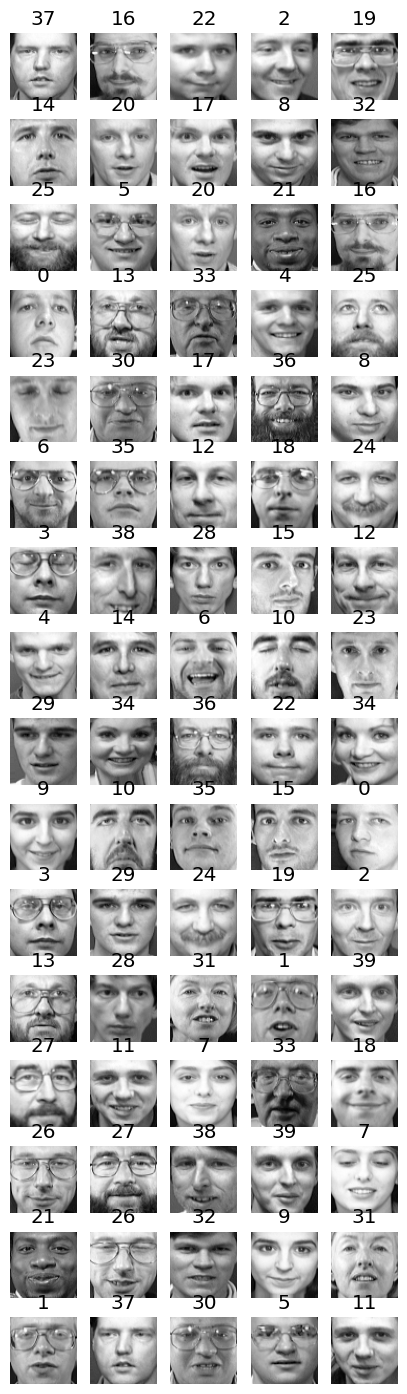

In [29]:
plot_faces(X_valid.values, y_valid)

In [30]:
from sklearn.decomposition import PCA

pca = PCA(0.99) # varianza explicada
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_ # 200 componentes (dimensiones transformadas)

199

In [31]:
pd.DataFrame(X_test_pca, columns= [f"feat_new_{i}" for i in range(1,pca.n_components_+1)])

,feat_new_1,feat_new_2,feat_new_3,feat_new_4,feat_new_5,feat_new_6,feat_new_7,feat_new_8,feat_new_9,feat_new_10,...,feat_new_190,feat_new_191,feat_new_192,feat_new_193,feat_new_194,feat_new_195,feat_new_196,feat_new_197,feat_new_198,feat_new_199
0,1.319206,4.907673,-0.665975,1.976573,0.172535,0.224676,1.677222,-0.832138,-1.031566,-1.253344,...,-0.000048,-0.018161,0.229044,-0.137330,0.089150,-0.109365,0.113428,0.003719,-0.104139,-0.193012
1,7.210846,4.937686,-1.431917,2.581334,-2.285505,-0.815750,-1.438243,-0.404741,0.037018,0.681650,...,-0.097715,-0.089087,0.112635,0.242779,0.089813,0.198877,0.027609,-0.116776,0.099386,0.147592
2,-0.162350,0.658067,4.643725,-2.924354,1.569206,-0.230669,-0.069935,-0.293558,0.211394,0.340008,...,0.007550,-0.077142,-0.158626,-0.046653,-0.188969,0.146966,-0.008061,0.057935,0.214985,-0.012496
3,4.193233,-0.094284,-1.398797,1.055915,-1.592555,-0.590741,-1.309242,0.895108,0.693669,-0.675779,...,0.070642,-0.137601,0.035329,0.233139,0.158099,-0.091695,-0.138618,-0.077928,-0.012595,0.092486
4,5.738949,2.714269,-1.845911,-0.523782,0.570254,-1.074333,-1.314795,-1.254670,-0.036505,-1.107026,...,0.082129,0.046875,0.174040,-0.230977,-0.370507,-0.168971,-0.105417,0.244665,0.070615,-0.108175
5,-2.200737,-2.761337,1.241820,-1.320488,-0.291711,-3.240554,1.700627,-1.377377,-1.007007,2.078627,...,-0.222114,-0.202873,0.042942,-0.236224,0.019725,-0.119987,0.089971,0.056288,-0.050723,-0.089616
6,0.292877,1.070663,1.726502,-3.072546,-0.839194,1.521744,1.805031,2.466923,-0.357644,-0.149589,...,0.022388,0.025135,-0.097484,-0.190568,-0.103978,-0.070188,-0.046175,0.121436,-0.159559,-0.013618
7,-1.058887,0.016610,3.675753,0.213917,0.963635,-1.748492,-0.429233,0.946544,-0.390233,-0.899269,...,-0.119493,-0.134892,-0.018941,-0.086483,0.133271,0.060268,-0.030946,-0.095636,-0.102553,0.066991
8,3.818611,3.901294,-3.890279,-1.323506,1.020491,-1.880159,-0.629833,1.993168,-0.577403,0.044619,...,0.254107,-0.242301,0.186970,0.332091,0.120697,-0.091347,-0.086379,0.229433,-0.258230,-0.383358
9,-0.445045,-5.984169,0.987058,0.017720,-0.115808,0.763190,0.387905,-0.081887,0.541946,0.814124,...,-0.072052,-0.057441,0.027814,-0.017942,0.050873,0.010463,-0.021621,-0.008355,0.089645,0.072907


In [32]:
from sklearn.cluster import KMeans

k_range = range(5, 151, 5)
kmeans_per_k = []
for k in k_range:
    print(f"k={k}")
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145
k=150


In [33]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index] # Esto para pintarlo 
best_score = silhouette_scores[best_index] # equivalente a max(silhouette_scores)


In [34]:
best_k

120

In [35]:
best_model = kmeans_per_k[best_index]

Cluster 0


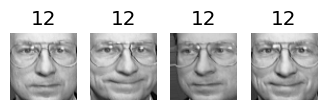

Cluster 1


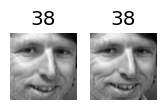

Cluster 2


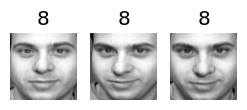

Cluster 3


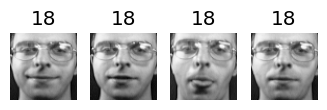

Cluster 4


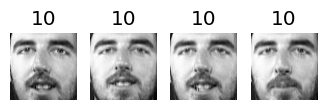

Cluster 5


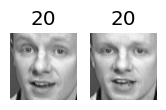

Cluster 6


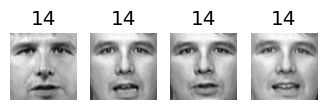

Cluster 7


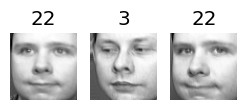

Cluster 8


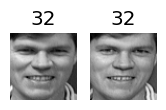

Cluster 9


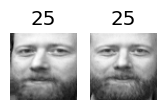

Cluster 10


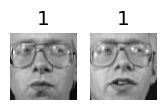

Cluster 11


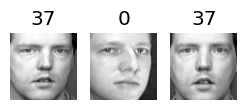

Cluster 12


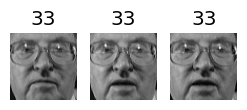

Cluster 13


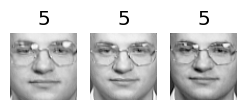

Cluster 14


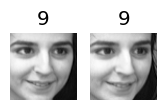

Cluster 15


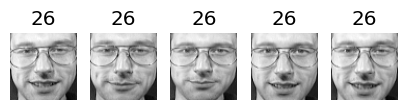

Cluster 16


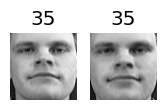

Cluster 17


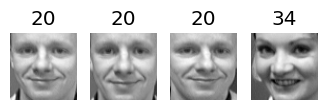

Cluster 18


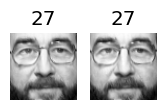

Cluster 19


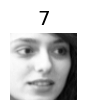

Cluster 20


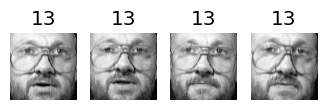

Cluster 21


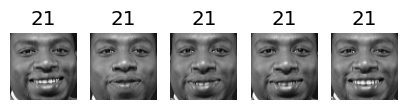

Cluster 22


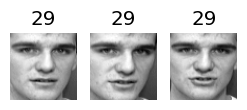

Cluster 23


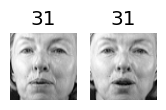

Cluster 24


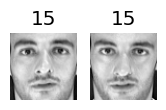

Cluster 25


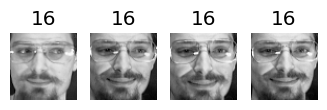

Cluster 26


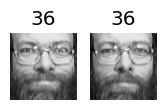

Cluster 27


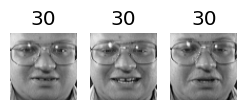

Cluster 28


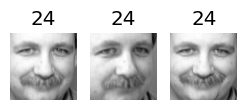

Cluster 29


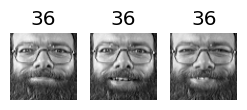

In [36]:

for cluster_id in np.unique(best_model.labels_)[0:30]:
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster].values # con X_train, NO X_train_pca porque cada fila es la misma foto, pero no se vería
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

In [37]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca, y_train)
clf.score(X_valid_pca, y_valid)

0.8625

In [38]:

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_valid, y_valid) # sin PCA

0.95

In [39]:
X_train_reduced = best_model.transform(X_train_pca)  # best_model es un KMeans con k = 120 ; X_train_pca son 280 filas, 200 features PCA; 280 filas y 120 columnas
X_valid_reduced = best_model.transform(X_valid_pca) # transform devuelve las distancias a cada centroide; 80 filas, 120 columnas
X_test_reduced = best_model.transform(X_test_pca) # 40 filas, 120 columnas

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train) # dadas 120 columnas, predice la cara
    
clf.score(X_valid_reduced, y_valid) # accuracy medio

0.7375

### #2 MODELO PARA LAS MICROCÁMARAS
**Objetivo:** Construir un modelo que pueda funcionar en las microcámaras, es decir que pueda funcionar con datos comprimidos.

Para cumplir con el objetivo se os ocurre emplear la doble propiedad de la PCA, que permite comprimir datos y mantener la capacidad informativa de estos. Sigue los siguientes pasos:
1. Instancia un objeto PCA sobre los datos de Train sin especificar ni componentes ni varianza explicada (o sea sin pasar argumentos).
2. Escoge un rango de valores para el número de PCAs que permitan por lo menos una compresión de la imagen de entre el 0.2% y el 2.5% (prueba al menos 5 valores). NOTA: La compresión es la reducción total, es decir una reducción del 1% quiere decir que el dataset se reduce a un 1% de su tamaño original)
3. Para el rango anterior entrena un modelo de clasificación y apunta su scoring en una validación cruzada de 5 folds y métrica el recall medio y su scoring contra test.
4. Muestra en un dataframe el valor de numero de componentes principales empleado, el scoring en CV, el scoring contra test, el % de compresión, la diferencia con el scoring de CV del modelo base, la diferencia con el scoring en test.
5. Escoge el número de componentes que permitirían tener la mayor compresión con una pérdida inferior a 3 puntos porcentuales tanto en CV como en test. Si no hay escoge el que tenga una pérdida inferior a 5 puntos porcentuales. 

In [40]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [41]:
df_prueba = pd.read_csv("./data/prueba.csv")

df_prueba_comprimida = pd.read_csv("./data/prueba_comprimida.csv")

In [42]:
df_prueba.head()

,Unnamed: 0,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_4086,pixel_4087,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095
0,139,0.409091,0.500000,0.619835,0.611570,0.619835,0.603306,0.677686,0.723140,0.760331,...,0.227273,0.173554,0.173554,0.177686,0.103306,0.090909,0.078512,0.095041,0.090909,0.082645
1,58,0.256198,0.400826,0.301653,0.264463,0.202479,0.545455,0.607438,0.615702,0.673554,...,0.590909,0.603306,0.595041,0.611570,0.603306,0.611570,0.619835,0.652893,0.690083,0.698347
2,34,0.669422,0.665289,0.694215,0.702479,0.710744,0.739669,0.760331,0.772727,0.785124,...,0.326446,0.330578,0.330578,0.347107,0.322314,0.351240,0.351240,0.334711,0.334711,0.338843
3,126,0.285124,0.285124,0.272727,0.214876,0.169422,0.165289,0.264463,0.446281,0.491736,...,0.359504,0.342975,0.326446,0.322314,0.301653,0.289256,0.305785,0.301653,0.309917,0.314050
4,109,0.256198,0.264463,0.260331,0.466942,0.727273,0.814050,0.822314,0.818182,0.822314,...,0.268595,0.219008,0.169422,0.111570,0.161157,0.264463,0.152893,0.090909,0.111570,0.115702


In [43]:
df_prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Columns: 4097 entries, Unnamed: 0 to pixel_4095
dtypes: float64(4096), int64(1)
memory usage: 10.0 MB


### #3 COMPRESION PARA CLASIFICACION POSTERIOR

**Objetivo**: Obtener el número de componentes que permita una compresión menor y al tiempo que el modelo en el servidor central no baje su rendimiento respecto a no usar imágenes comprimidas.

Para esta parte la idea que se os ha ocurrido es emplear también la PCA como compresor ya que así siempre podrían pasar a la opción anterior si eso fuese suficiente. Pero en este caso no vamos a utilizar el dataset comprimido con las PCAs para detectar las caras, sino el dataset una vez descomprimido (recuerda que puede emplear `inverse_transform` para "descomprimir"). Los pasos a seguir son:

1. Escoge un rango de valores que  permitan una compresión aún mayor (recuerda que el ancho de banda es mínimo) entre el 1 por mil y el 1 por ciento. Escoge 5 valores de número de PCAs que permitan movernos en ese rango.
2. Para cada uno de esos valores: aplica la PCA al X_train, obten un X_train_unzipped aplicando la inversa de la PCA y entrena un modelo de clasificación y pruébalo contra test, apunta el balanced accuracy.
3. Crea un dataframe o haz un visualización comparando como es la medidad de balance accuracy para cada valor de número de pcas escogido y cuál su factor de compresión. 
4. Sabiendo que no podemos perder más de 3 puntos porcentuales respecto al baseline, ¿qué numero de PCA escogerías?

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [45]:
img = cv2.imread('./data/prueba.csv') 
plt.imshow(img);

In [46]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [47]:
blue, green, red = cv2.split(img) 

ValueError: not enough values to unpack (expected 3, got 0)

In [ ]:
# Initialize PCA with first 20 principal components
pca = PCA(20)
 
#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
print('red_transformed.shape:', red_transformed.shape)
red_inverted = pca.inverse_transform(red_transformed)
print('red_inverted.shape:', red_inverted.shape)
 
#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
print('green_transformed.shape:', green_transformed.shape)
green_inverted = pca.inverse_transform(green_transformed)
print('green_inverted.shape:', green_inverted.shape)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
print('blue_transformed.shape:', blue_transformed.shape)
blue_inverted = pca.inverse_transform(blue_transformed)
print('blue_inverted.shape:', blue_inverted.shape)

### #EXTRA

1. Para la segunda parte, visualiza en cuatro gráficos un scatter plot de las dos primeras componentes principales de la PCA escogida y colorea cada punto con las clases correspondientes a cada cara (como hay 40 clases, usa 10 por gráfico, 1-10 en el primero, 11-20 en el segundo, etc)
2. Para la tercer parte crea una función (modifica la de la práctica de la unidad de KMeans, por ejemplo) que permita ver la cara sin comprimir y la cara después de haberla descomprimido y haz una comprobación de cómo quedan (visualiza 5 caras por ejemplo) para cada uno de los valores de números de PCAs probados. Añade el caso para 150 y 300 PCs para que se vea que son las mismas claras con claridad.